# Comparison: GapNet vs. Vanilla

In this section we want to compare ...

## Initialization

In [1]:
import gapnet as gapnet
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score
from numpy import load 
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 10)

## Import data

In [2]:
from numpy import isnan
X = load('data/X.npy') 
y = load('data/y.npy')

print("Number of features {}".format(X.shape[1]))
print("Number of subjects {}".format(X.shape[0]))

X_overlap = X[~isnan(X).any(axis=1)]
y_overlap = y[~isnan(X).any(axis=1)]

Number of features 40
Number of subjects 1000


## Generate gapnet model and vanilla model

In [3]:
vanilla_model = gapnet.generate_vanilla_model(n_feature = X.shape[1],n_classes = 2)
vanilla_model.build_model(show_summary=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3280      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 162       
Total params: 9,922
Trainable params: 9,922
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
gapnet_model = gapnet.generate_gapnet_model(cluster_sizes = [25,15], n_feature = X.shape[1],n_classes = 2)
gapnet_model.build_model(show_summary=True)

[50 30]
Generating the 1 neural network model ... 
 
Generating the 2 neural network model ... 
 
Generating the final gapnet model ... 
 
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 25)]         0           []                               
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 15)]         0           []                               
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 50)           1300        ['input_4[0][0]']                
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           4

## Training GapNet model and Vanilla model

In [5]:
num_trials = 5
for i in range(num_trials):
    i = i + 1
    print("Training process of trial #{} is starting...".format(i))
    X_train, y_train, X_test, y_test = gapnet.preprocess(X_overlap, y_overlap)
    vanilla_model.train_single_stage(X_train, y_train, X_test, y_test)

Training process of trial #1 is starting...
Training process is done.
Training process of trial #2 is starting...
Training process is done.
Training process of trial #3 is starting...
Training process is done.
Training process of trial #4 is starting...
Training process is done.
Training process of trial #5 is starting...
Training process is done.


In [6]:
num_trials = 5
for i in range(num_trials):
    i = i + 1
    print("Training process of trial #{} is starting...".format(i))
    X_train, y_train, X_test, y_test = gapnet.preprocess_with_missing_data(X,y)
    gapnet_model.train_first_stage(X_train, y_train, X_test, y_test)
    gapnet_model.train_second_stage(X_train, y_train, X_test, y_test)

Training process of trial #1 is starting...
[50 30]
Generating the 1 neural network model ... 
 
Generating the 2 neural network model ... 
 
Generating the final gapnet model ... 
 
Training process of clust #1 is done.
Training process of clust #2 is done.
Training process of first stage is done.
Training process of second stage is done.
Training process of trial #2 is starting...
[50 30]
Generating the 1 neural network model ... 
 
Generating the 2 neural network model ... 
 
Generating the final gapnet model ... 
 
Training process of clust #1 is done.
Training process of clust #2 is done.
Training process of first stage is done.
Training process of second stage is done.
Training process of trial #3 is starting...
[50 30]
Generating the 1 neural network model ... 
 
Generating the 2 neural network model ... 
 
Generating the final gapnet model ... 
 
Training process of clust #1 is done.
Training process of clust #2 is done.
Training process of first stage is done.
Training process

## Present the results

In [7]:
gapnet.present_results(vanilla_model)

Results :
best_epochs [17, 12, 3, 2, 4]
train_accuracy 0.623+/-0.082 : [0.7   0.7   0.55  0.5   0.663]
val_accuracy 0.520+/-0.093 : [0.35 0.5  0.6  0.6  0.55]
val_auc 0.566+/-0.074 : [0.434 0.556 0.626 0.646 0.566]
val_sens 0.461+/-0.171 : [0.167 0.4   0.571 0.667 0.5  ]
val_spec 0.550+/-0.066 : [0.429 0.533 0.615 0.588 0.583]
val_prec 0.289+/-0.133 : [0.111 0.222 0.444 0.222 0.444]


In [8]:
gapnet.present_results(gapnet_model)

Results :
best_epochs [587, 173, 223, 103, 324]
train_accuracy 0.905+/-0.033 : [0.863 0.887 0.962 0.913 0.9  ]
val_accuracy 0.920+/-0.024 : [0.95 0.9  0.9  0.9  0.95]
val_auc 0.964+/-0.023 : [1.    0.939 0.97  0.939 0.97 ]
val_sens 0.851+/-0.040 : [0.9   0.818 0.818 0.818 0.9  ]
val_spec 1.000+/-0.000 : [1. 1. 1. 1. 1.]
val_prec 1.000+/-0.000 : [1. 1. 1. 1. 1.]


## Compare the performances

training loss across epochs

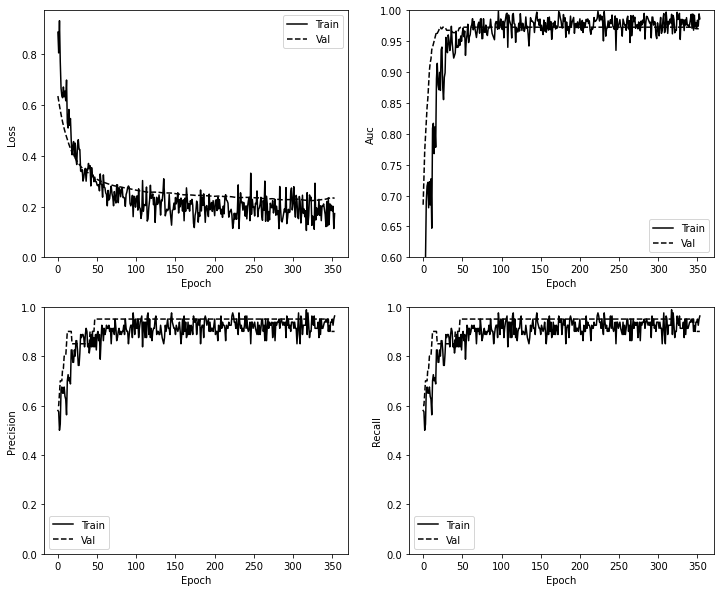

In [9]:
gapnet.plot_metrics(gapnet_model.history['gapnet'])

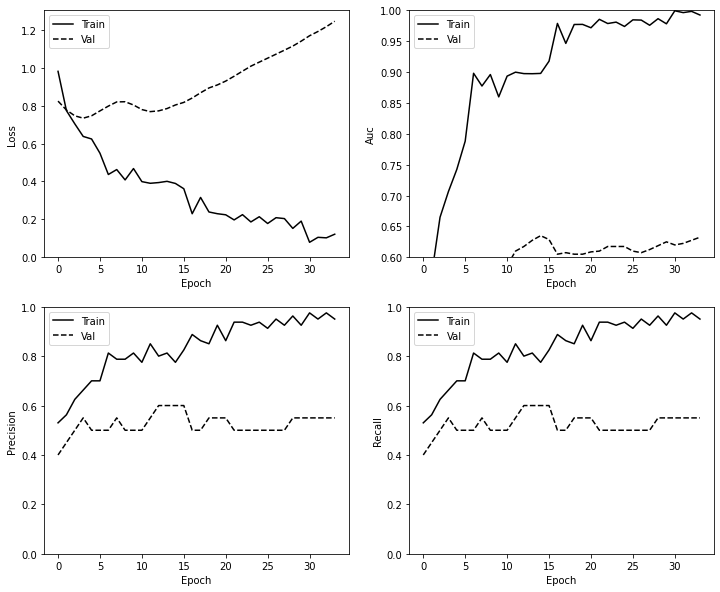

In [10]:
gapnet.plot_metrics(vanilla_model.history)

ROC curve

In [11]:
print('AUC-ROC for the GapNet structure: {:.3f}'.format(roc_auc_score(gapnet_model.val_y_labels, gapnet_model.val_y_preds)))
print('AUC-ROC for the Vanilla structure: {:.3f}'.format(roc_auc_score(vanilla_model.val_y_labels, vanilla_model.val_y_preds)))

AUC-ROC for the GapNet structure: 0.963
AUC-ROC for the Vanilla structure: 0.565


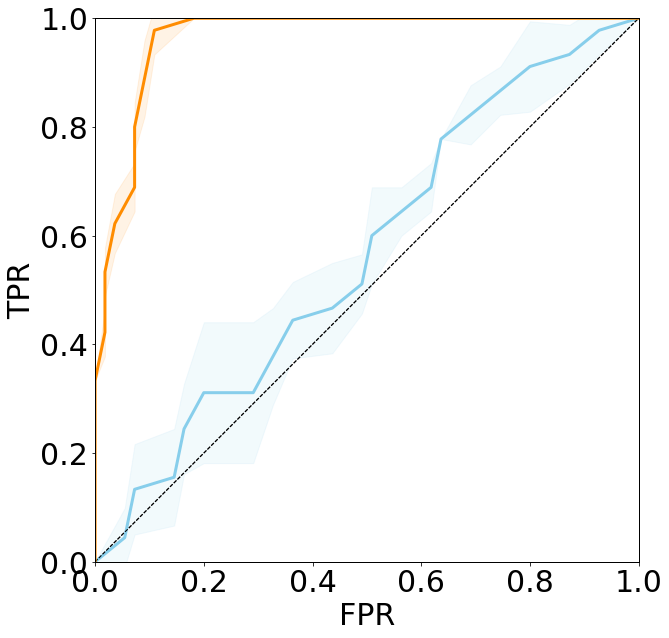

In [12]:
gapnet.plot_roc_avg("vanilla", vanilla_model.val_y_labels, vanilla_model.val_y_preds, num_trials, linestyle='solid', color='skyblue')
gapnet.plot_roc_avg("gapnet", gapnet_model.val_y_labels, gapnet_model.val_y_preds, num_trials, linestyle='solid', color='darkorange')

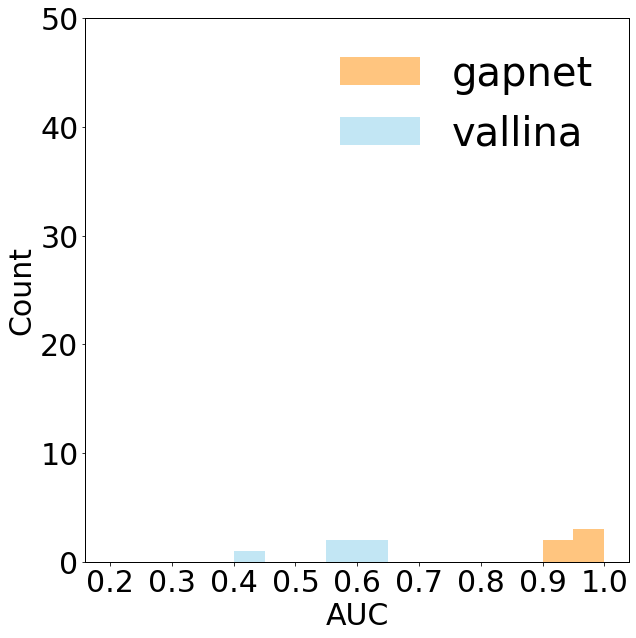

In [13]:
# Histograms of AUC values
gapnet.plot_hist(gapnet_model.val_aucs, 'gapnet', color='darkorange', alpha=0.5)
gapnet.plot_hist(vanilla_model.val_aucs, 'vallina', color='skyblue', alpha=0.5)

Legitimate Transactions Detected (True Negatives):  47
Legitimate Transactions Incorrectly Detected (False Positives):  8
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  45
Total Fraudulent Transactions:  45


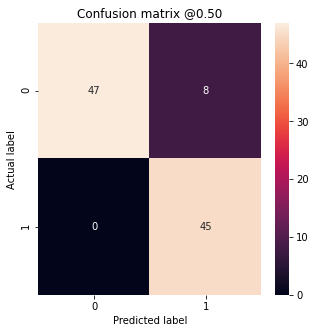

In [14]:
gapnet.plot_cm(gapnet_model.val_y_labels, gapnet_model.val_y_preds, 0.5)

Legitimate Transactions Detected (True Negatives):  39
Legitimate Transactions Incorrectly Detected (False Positives):  16
Fraudulent Transactions Missed (False Negatives):  32
Fraudulent Transactions Detected (True Positives):  13
Total Fraudulent Transactions:  45


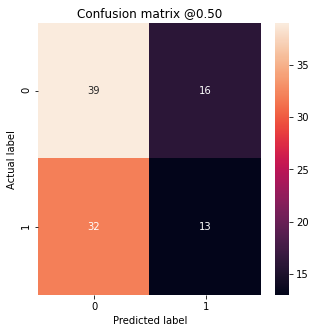

In [15]:
gapnet.plot_cm(vanilla_model.val_y_labels, vanilla_model.val_y_preds, 0.5)

In [16]:
# Compute the Delong test to compare the two networks

z-score, p-value = gapnet.delong_test(gapnet_model.val_y_preds[1,:], vanilla_model.val_y_preds[1,:], gapnet_model.val_y_labels[1,:])

print("The Delong test between Vanilla and Gapnet lead to a z-score of {:.3f} with a p-value of {:.3f}".format(z-score, p-value))

SyntaxError: can't assign to operator (<ipython-input-16-8eb51687e7e7>, line 3)